In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.stats import zscore
import seaborn as sns

In [2]:
home = '/net/mraid20/export/genie/LabData/Analyses/barakdan/Diet_Microbiome/'
home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'

In [3]:
def read_results(df):
    output = []
    for col in df.columns:
        output.append(df[col])
    return tuple(output)

In [4]:
diet_mb = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_mb.pkl")
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, diet_features, mb_features = loaded_lists

diet_mb.columns = diet_mb.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
mb_features = [re.sub(r'[^a-zA-Z0-9_]', '_', x) for x in mb_features]
diet_features = [re.sub(r'[^a-zA-Z0-9_]', '_', x) for x in diet_features]

mb_features = mb_features + ['Richness', 'Shannon_diversity'] + base_features
all_diet_targets = [feat for feat in diet_features if feat not in ['age', 'gender']]

diet_mb

,Acorn_squash,Alfalfa_sprouts,Almond_Beverage,Almond_flour,Almond_spread,Almonds,Amba,Anchovy,Aperol,Apple,...,fBin__88_gBin__434_sBin__637,fBin__94_gBin__448_sBin__654,fBin__94_gBin__449_sBin__656,fBin__95_gBin__450_sBin__659,fBin__96_gBin__457_sBin__669,fBin__97_gBin__462_sBin__676,fBin__97_gBin__462_sBin__678,fBin__99_gBin__469_sBin__687,Richness,Shannon_diversity
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.016416,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,189,3.71
10K_1001201093,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.013895,...,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.000000,150,3.30
10K_1002254441,0.0,0.000000,0.0,0.0,0.0,0.080736,0.0,0.0,0.000000,0.000000,...,-4.000000,-3.368405,-4.0,-4.0,-4.0,-4.000000,-2.523371,-4.000000,250,3.32
10K_1003113258,0.0,0.000000,0.0,0.0,0.0,0.002037,0.0,0.0,0.000000,0.008880,...,-4.000000,-3.677630,-4.0,-4.0,-4.0,-4.000000,-3.861761,-4.000000,262,3.90
10K_1007330152,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,-2.494574,-4.000000,-4.0,-4.0,-4.0,-4.000000,-1.941250,-2.985687,194,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9995823183,0.0,0.000054,0.0,0.0,0.0,0.051311,0.0,0.0,0.000000,0.000000,...,-3.610761,-3.347382,-4.0,-4.0,-4.0,-2.503550,-2.421434,-4.000000,206,3.57
10K_9996884777,0.0,0.000000,0.0,0.0,0.0,0.002401,0.0,0.0,0.000000,0.000000,...,-3.213395,-3.367979,-4.0,-4.0,-4.0,-4.000000,-3.850233,-3.804074,257,3.89
10K_9998420917,0.0,0.000000,0.0,0.0,0.0,0.019408,0.0,0.0,0.000000,0.018232,...,-2.803094,-3.327214,-4.0,-4.0,-4.0,-2.582016,-2.457185,-4.000000,264,4.13


In [5]:
print(f"There are {len(all_diet_targets)} diet features")
print(f"There are {len(mb_features)} mb features")

There are 785 diet features
There are 729 mb features


In [6]:

index_of_energy = all_diet_targets.index("Energy")

print(index_of_energy)  # Output: 3


636


In [7]:
diet_mb['Cooked_eggplant']

RegistrationCode
10K_1000942861    0.0
10K_1001201093    0.0
10K_1002254441    0.0
10K_1003113258    0.0
10K_1007330152    0.0
                 ... 
10K_9995823183    0.0
10K_9996884777    0.0
10K_9998420917    0.0
10K_9999226141    0.0
10K_9999409119    0.0
Name: Cooked_eggplant, Length: 9647, dtype: float64

In [8]:
ridge_diet_scores, ridge_diet_pvalues, ridge_diet_coefs, ridge_diet_preds, ridge_diet_targets = read_results(pd.read_pickle(home_path + "data/reverse/output_ridge_diet.pkl"))
ridge_diet_scores

lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets = read_results(pd.read_pickle(home_path + "data/reverse/output_LGBM_diet.pkl"))
print(lgbm_diet_scores.sort_values(ascending=False))

715    0.664168
638    0.638659
783    0.629156
646    0.591473
716    0.583244
         ...   
567   -0.027140
341   -0.027228
131   -0.027231
589   -0.029153
370   -0.038481
Name: 0, Length: 785, dtype: float64


In [9]:
# Creating the DataFrame
labeled_scores = pd.DataFrame({"Diet Target": all_diet_targets, "LGBM Score": lgbm_diet_scores})

# Display the DataFrame
labeled_scores = labeled_scores.sort_values(by='LGBM Score', ascending=False).head(100)


In [10]:
labeled_scores[labeled_scores['Diet Target'] == 'Cooked_eggplant']

,Diet Target,LGBM Score


In [11]:
all_diet_targets[:3]

['Acorn_squash', 'Alfalfa_sprouts', 'Almond_Beverage']

## Filter non significant corr targets from pearson p-values

LGBM

In [12]:
all_diet_targets

['Acorn_squash',
 'Alfalfa_sprouts',
 'Almond_Beverage',
 'Almond_flour',
 'Almond_spread',
 'Almonds',
 'Amba',
 'Anchovy',
 'Aperol',
 'Apple',
 'Apple_Cake',
 'Apple_Vinegar',
 'Apple_juice',
 'Applesauce',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado_Sandwich',
 'Bagel',
 'Baguette',
 'Baked_apple',
 'Baklava',
 'Balsamic_vinegar',
 'Bamba',
 'Banana',
 'Banana_Cake',
 'Barbecue_sauce',
 'Barley_soup',
 'Basil',
 'Bean_Noodles',
 'Bean_soup',
 'Beans',
 'Beans_black_eyed_peas',
 'Beef',
 'Beef_Cholent',
 'Beef_Lasagna',
 'Beef_Shawarma',
 'Beef_tongue',
 'Beer',
 'Beet',
 'Beet_Juice',
 'Beet_Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black_beans',
 'Blintzes',
 'Blue_Cheese',
 'Blueberries',
 'Boiled_corn',
 'Bolognese',
 'Bounty',
 'Brandy',
 'Brazil_nuts',
 'Bread',
 'Bread_Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Broth_and_potatoes',
 'Brown_Rice',
 'Brown_Sugar',
 'Brownies',
 'Buckwheat_Bread',
 'Buckwheat_crackers',
 'Bulgur',
 

In [13]:
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/significant_LGBM_diet_targets.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
significant_lgbm_targets = loaded_lists
significant_lgbm_targets_index = [all_diet_targets.index(item) for item in significant_lgbm_targets]
lgbm_diet_scores = lgbm_diet_scores.loc[significant_lgbm_targets_index]
lgbm_diet_scores

0      0.028958
1      0.075807
3      0.080830
4      0.080108
5      0.252292
         ...   
780    0.325030
781    0.419852
782    0.441128
783    0.629156
784    0.146583
Name: 0, Length: 449, dtype: float64

Ridge

In [14]:
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/significant_ridge_diet_targets.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
significant_ridge_targets = loaded_lists
significant_ridge_targets_index = [all_diet_targets.index(item) for item in significant_ridge_targets]
ridge_diet_scores = ridge_diet_scores.loc[significant_ridge_targets_index]
ridge_diet_scores

0      0.031287
1      0.041692
3      0.076545
4      0.047661
5      0.184042
         ...   
780    0.270992
781    0.267916
782    0.371413
783    0.589768
784    0.124760
Name: 0, Length: 456, dtype: float64

Define interesting diet targets (from thos who passed significance)

In [15]:
diet_adherence_targets = [
    'med_score_per_day', 'paleo_score_per_day', 'vegetarian_score_per_day',
    'wfpb_score_per_day', 'vegan_score_per_day', 'pescatarian_score_per_day',
    'carnivore_score_per_day', 'NOVA_food_score'
]

# Get top 20 LGBM targets
top_lgbm_targets = [
    diet_features[idx] for idx, _ in sorted(
        lgbm_diet_scores.items(), key=lambda x: x[1], reverse=True
    )
][:20]

# Get top 20 Ridge targets
top_ridge_targets = [
    diet_features[idx] for idx, _ in sorted(
        ridge_diet_scores.items(), key=lambda x: x[1], reverse=True
    )
][:20]

In [16]:
len(diet_features)

787

In [17]:
index = diet_features.index('wfpb_score_per_day')
print(f"The index of '{'wfpb_score_per_day'}' is: {index}")

The index of 'wfpb_score_per_day' is: 715


In [18]:
mb_names = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/mb_names.pkl")
mb_names.index = [re.sub(r'[^a-zA-Z0-9_]', '_', x) for x in mb_names.index]

In [19]:
mb_names.head()

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,...,sSGB,gSGB,fSGB,kingdom_new,phylum_new,class_new,order_new,family_new,genus_new,species_new
fBin__14_gBin__27_sBin__33,Rep_33,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp000438015,33.0,27.0,...,8779,6132,2164,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia sp000438015
fBin__14_gBin__34_sBin__41,Rep_41,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545715,41.0,34.0,...,8767,6123,2163,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia gallistercoris
fBin__14_gBin__34_sBin__42,Rep_42,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545705,42.0,34.0,...,8768,6123,2163,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia sp900545705
fBin__17_gBin__39_sBin__51,Rep_51,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,RC9,RC9 sp000433355,51.0,39.0,...,2230,1627,658,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,Cryptobacteroides,Cryptobacteroides sp000433355
fBin__27_gBin__64_sBin__81,Rep_81,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus,81.0,64.0,...,1790,1333,589,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus


In [20]:
mb_names['species_new']

fBin__14_gBin__27_sBin__33                 Merdousia sp000438015
fBin__14_gBin__34_sBin__41              Merdousia gallistercoris
fBin__14_gBin__34_sBin__42                 Merdousia sp900545705
fBin__17_gBin__39_sBin__51         Cryptobacteroides sp000433355
fBin__27_gBin__64_sBin__81              Odoribacter splanchnicus
                                               ...              
fBin__619_gBin__2353_sBin__3576               UBA737 sp900549755
fBin__619_gBin__2353_sBin__3578               UBA737 sp905193585
fBin__625_gBin__2361_sBin__3588             UMGS1071 sp900541905
fBin__625_gBin__2361_sBin__3589             UMGS1071 sp900542375
fBin__627_gBin__2363_sBin__3592              CAG-557 sp000435275
Name: species_new, Length: 725, dtype: object

In [21]:
top_diet_features = lgbm_diet_scores.sort_values(ascending=False)
top_diet_features = top_diet_features.head()
top_diet_features

715    0.664168
638    0.638659
783    0.629156
646    0.591473
716    0.583244
Name: 0, dtype: float64

### SHAP Analyses

In [22]:
# shap_orig = pd.read_pickle(home_path + "data/reverse/output_SHAP_LGBM_diet.pkl")
# shap_orig = shap_orig.iloc[:, 5:]
# shap_orig.shape

In [23]:
# shap_orig

In [24]:
def mean_abs_shap(shap_orig_path, output_path, targets, all_diet_targets):
    mean_abs_shap = pd.Series(np.zeros(len(mb_features)))

    # Load SHAP values:,
    # each row is a diet target, each column is a specific person, 
    # each cell is a list of 729 shap values of the corresponding microbial features
    # for this diet target in this specific person.

    shap_orig = pd.read_pickle(shap_orig_path)
    
    # Get target indices from `all_diet_targets`
    target_indices = [all_diet_targets.index(t) for t in targets]

    # Ignore first 5 metadata columns
    shap_filtered = shap_orig.iloc[target_indices, 5:]  

    print(shap_filtered.shape)
    # Compute mean absolute SHAP values
    for idx, target in zip(target_indices, targets):
        print(f"Processing target: {target} (Index: {idx})")

        # Take one row (diet target)
        shap = shap_filtered.loc[idx]

        # Each shap_df is for a single diet target (i): 
        # each row is a person (sample), each column is a microbial feature, 
        # value is the shap of that feature for the specific person
        shap_df = pd.DataFrame(shap.tolist())

        # Each to_concat is for a single diet target (i): 
        # Computes the average absolute SHAP value for each feature (column) across all people.
        # returns 729 values (for each microbial feature) per the current diet target
        to_concat = shap_df.abs().mean(axis=0).to_frame(name=str(idx))

        # Concatenate to results
        mean_abs_shap = pd.concat([mean_abs_shap, to_concat], axis=1)
    
    # Drop initial zero column (used for structure)
    mean_abs_shap = mean_abs_shap.iloc[:, 1:]

    # Save results
    mean_abs_shap.to_pickle(output_path)

    return mean_abs_shap

Run function on selected diet targets

In [25]:
# mean_abs_shap_lgbm_wfpb_score_per_day = mean_abs_shap(
#     shap_orig_path = home_path + "data/reverse/output_SHAP_LGBM_diet_scaled.pkl",
#     output_path = home_path + "data/reverse/mean_abs_shap_LGBM_all_scaled.pkl",
#     targets = all_diet_targets,
#     all_diet_targets = all_diet_targets
# )

#### What features predict the highly predicted microbes in ridge, according to linear coefficients?

In [26]:
ridge_diet_coefs

0      [-2.9371208028364392e-05, 5.981084644927533e-0...
1      [1.3656211221076315e-06, 2.2921650838025895e-0...
2      [0.00010975969618229659, -7.040712044124639e-0...
3      [-5.2694369727896784e-05, 5.654408105552522e-0...
4      [8.836096212276183e-05, 0.00019715078201643915...
                             ...                        
780    [1.8487495549533673e-05, -0.002291350599860416...
781    [0.0003468940180705274, -0.0010099434152044083...
782    [-0.0012474416900133082, 0.005028255916560351,...
783    [-0.0006553497192666757, -0.007960815491027475...
784    [-0.0009738704145359689, -0.006552813241712704...
Name: 2, Length: 785, dtype: object

In [27]:
top_coefs_med_score = pd.Series(ridge_diet_coefs[712]).abs().sort_values(ascending=False)[0:20].index
top_coefs_med_score

Int64Index([587, 728, 727, 172, 297, 268, 726, 230, 206, 264, 475, 319, 176,
             34,  46,  85,  33, 672, 221, 237],
           dtype='int64')

In [28]:
top_fnames_med_score = pd.Series(mb_features).loc[top_coefs_med_score]
top_fnames_med_score

587    fBin__541_gBin__2125_sBin__3275
728                             gender
727                                age
172    fBin__323_gBin__1306_sBin__1953
297    fBin__376_gBin__1555_sBin__2318
268    fBin__373_gBin__1519_sBin__2254
726                  Shannon_diversity
230    fBin__367_gBin__1465_sBin__2177
206    fBin__359_gBin__1425_sBin__2112
264    fBin__373_gBin__1510_sBin__2241
475    fBin__534_gBin__2015_sBin__3050
319    fBin__382_gBin__1575_sBin__2353
176    fBin__332_gBin__1323_sBin__1975
34       fBin__121_gBin__572_sBin__848
46      fBin__187_gBin__748_sBin__1116
85      fBin__257_gBin__959_sBin__1461
33       fBin__121_gBin__571_sBin__846
672       fBin__73_gBin__334_sBin__469
221    fBin__367_gBin__1456_sBin__2163
237    fBin__367_gBin__1470_sBin__2185
dtype: object

### Done on LGBM downstream, should do ridge too ?

#### What are the highest mean abs shap values?

In [29]:
mean_abs_shap_lgbm_top = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/mean_abs_shap_LGBM_top.pkl")
mean_abs_shap_lgbm_adherence = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/mean_abs_shap_LGBM_adherence.pkl")
mean_abs_shap_lgbm_all = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/mean_abs_shap_LGBM_all.pkl")
mean_abs_shap_lgbm_nova = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/mean_abs_shap_LGBM_nova.pkl")
# Ridge ?

# mean_abs_shap_ridge_adherence = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/mean_abs_shap_lgbm_top.pkl")
# mean_abs_shap_ridge_top = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/reverse/mean_abs_shap_lgbm_top.pkl")

In [30]:
energy_index = all_diet_targets.index('Lysine')
print("Index of 'Energy_':", energy_index)


Index of 'Energy_': 665


In [31]:
mean_abs_shap_lgbm_all.loc[:, ['665']].describe()

,665
count,7.290000e+02
mean,4.106134e-06
std,6.787121e-06
min,0.000000e+00
25%,4.673716e-07
50%,1.696492e-06
75%,4.689120e-06
max,6.291824e-05


Filter by significance

In [32]:
# mean_abs_shap_lgbm_all = mean_abs_shap_lgbm_all.iloc[:, significant_lgbm_targets_index]


In [33]:
# def mean_shap_over_features(mean_abs_shap):
#     mean_abs_shap_lgbm_abundance['mean_abs_shap'] = mean_abs_shap_lgbm_abundance.mean(axis=1)

### Which features have the most overall impact across multiple predicted targets?

Convert formal names to usefull microbial names

In [34]:
mb_names[['species', 'species_new']].head()

,species,species_new
fBin__14_gBin__27_sBin__33,CAG-312 sp000438015,Merdousia sp000438015
fBin__14_gBin__34_sBin__41,CAG-312 sp900545715,Merdousia gallistercoris
fBin__14_gBin__34_sBin__42,CAG-312 sp900545705,Merdousia sp900545705
fBin__17_gBin__39_sBin__51,RC9 sp000433355,Cryptobacteroides sp000433355
fBin__27_gBin__64_sBin__81,Odoribacter splanchnicus,Odoribacter splanchnicus


In [35]:
def convert_series_to_species(feature_series, mb_names):
    """Convert feature names to species, fallback to genus, then family, otherwise retain original name."""
    if not isinstance(feature_series, pd.Series):
        feature_series = pd.Series(feature_series)

    mb_names.index = mb_names.index.str.strip().str.lower()
    feature_series = feature_series.str.strip().str.lower()

    # Create mapping dictionaries
    name_to_species = mb_names['species_new'].to_dict()
    name_to_genus = mb_names['genus_new'].to_dict()
    name_to_family = mb_names['family_new'].to_dict()

    # Map species names
    species_series = feature_series.map(name_to_species)

    # Replace "unknown" species with genus name
    species_series = species_series.where(species_series != "unknown", feature_series.map(name_to_genus))

    # Replace "unknown" genus with family name
    species_series = species_series.where(species_series != "unknown", feature_series.map(name_to_family))

    # Ensure NaNs are replaced with the original feature name
    species_series = species_series.fillna(feature_series)

    return species_series

Prepeare mean abs shap plots for different diet target groups

In [36]:
def process_mean_abs_shap(mean_abs_shap_df,  mb_features, mb_names, filename, top_n=20):
  
    mean_abs_shap_df['mean_abs_shap'] = mean_abs_shap_df.mean(axis=1)
    mean_abs_shap_df['mean_abs_shap']

    mean_abs_shap_df['mean_abs_shap'].sort_values(ascending=False).head(top_n)

    top_shap_across_targets = mean_abs_shap_df['mean_abs_shap'].sort_values(ascending=False).head(top_n).index
    top_shap_across_targets_fnames = pd.Series(mb_features).loc[top_shap_across_targets]
    top_shap_across_targets_fnames[:7]

    # Apply function to convert feature names to species names
    top_shap_across_targets_fnames = convert_series_to_species(top_shap_across_targets_fnames, mb_names)
    # Display results
    # print(top_shap_across_targets_fnames[:7])
    # print(pd.concat([top_shap_across_targets_fnames, mean_abs_shap_df['mean_abs_shap'].sort_values(ascending=False).head(20)], axis=1))

    # Assuming the data is provided as described
    # Combining the feature names with their SHAP values
    shap_data = pd.concat([top_shap_across_targets_fnames, mean_abs_shap_df['mean_abs_shap'].sort_values(ascending=False).head(20)], axis=1)

    # Rename columns for clarity
    shap_data.columns = ['Feature', 'Mean Absolute SHAP Value']

    # Sort values by SHAP for better visual clarity
    shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

    # Create a horizontal bar chart
    plt.figure(figsize=(8, 6), dpi=300)
    plt.barh(shap_data['Feature'], shap_data['Mean Absolute SHAP Value'], color='cadetblue', edgecolor='none')

    # Add labels and title
    plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    # plt.title('Top Features by Mean Absolute SHAP Value', fontsize=14)

    # Improve layout
    plt.tight_layout()
    # plt.savefig(home + f"figures/reverse/mean_abs_shap_{filename}.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')

    # Show the plot
    plt.show()

Top pearson correlation (top predicted diet features)

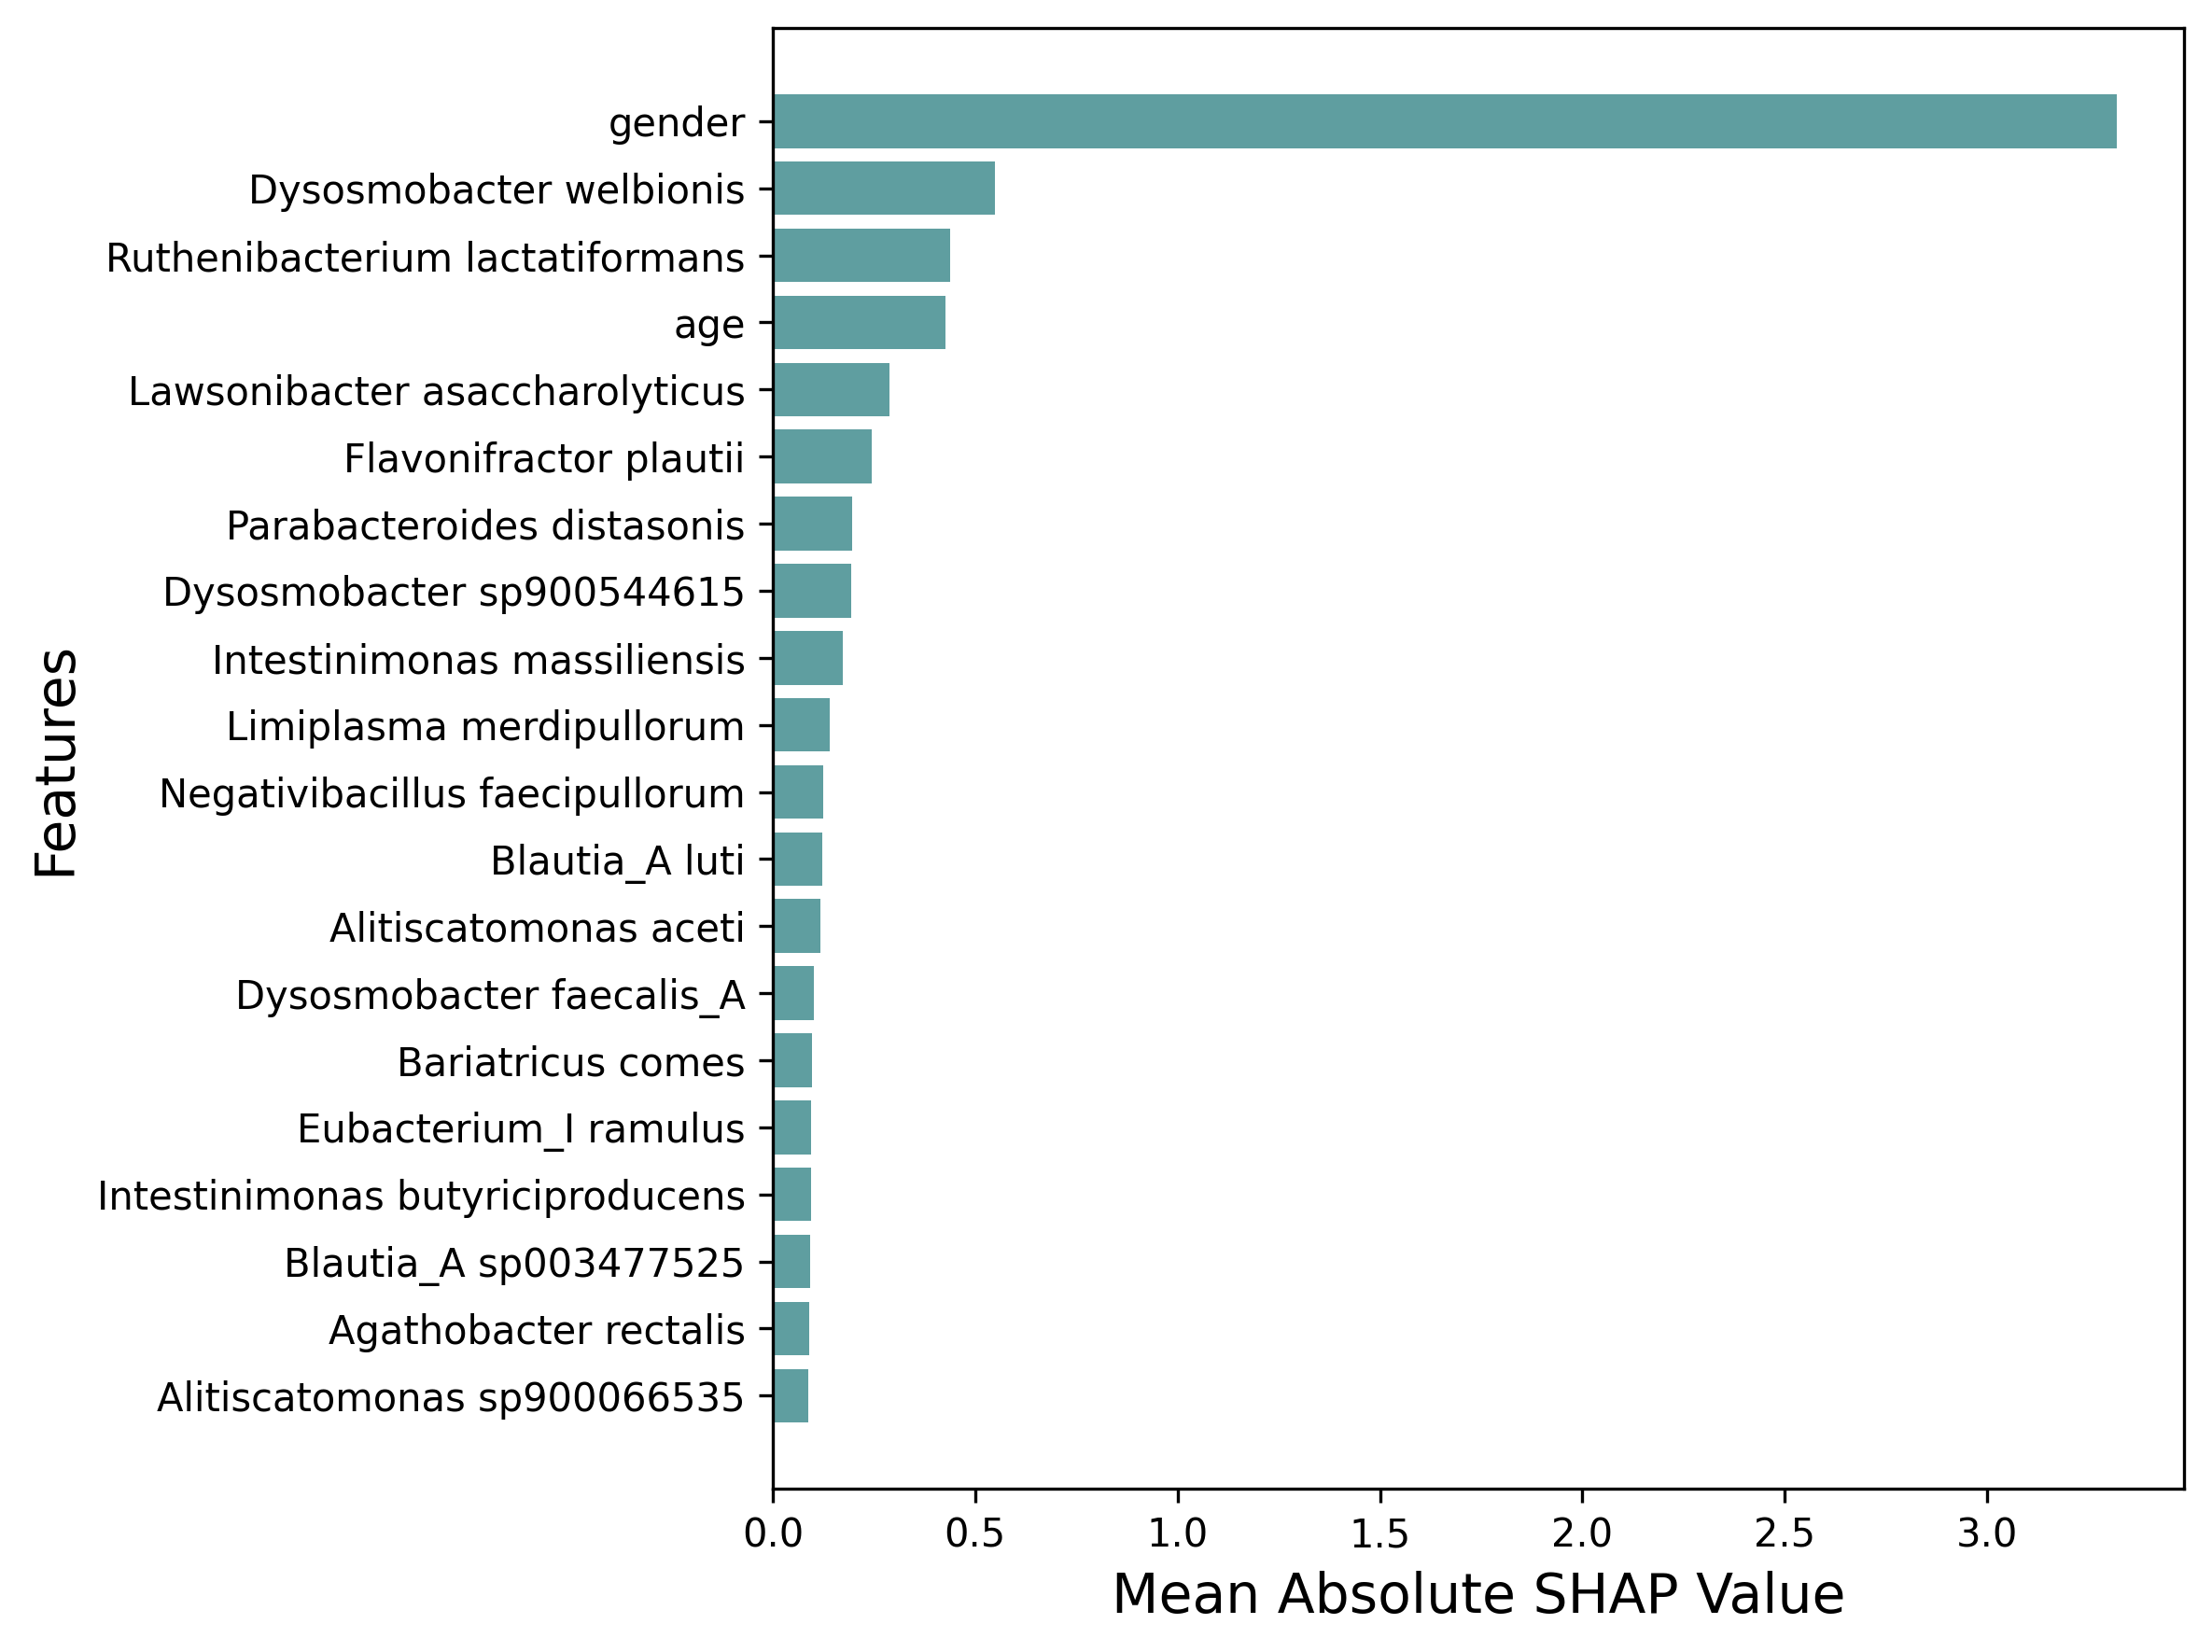

In [37]:
process_mean_abs_shap(mean_abs_shap_lgbm_top,  mb_features, mb_names, filename="top_20_pearson" ,top_n=20)

Diet adherence targets

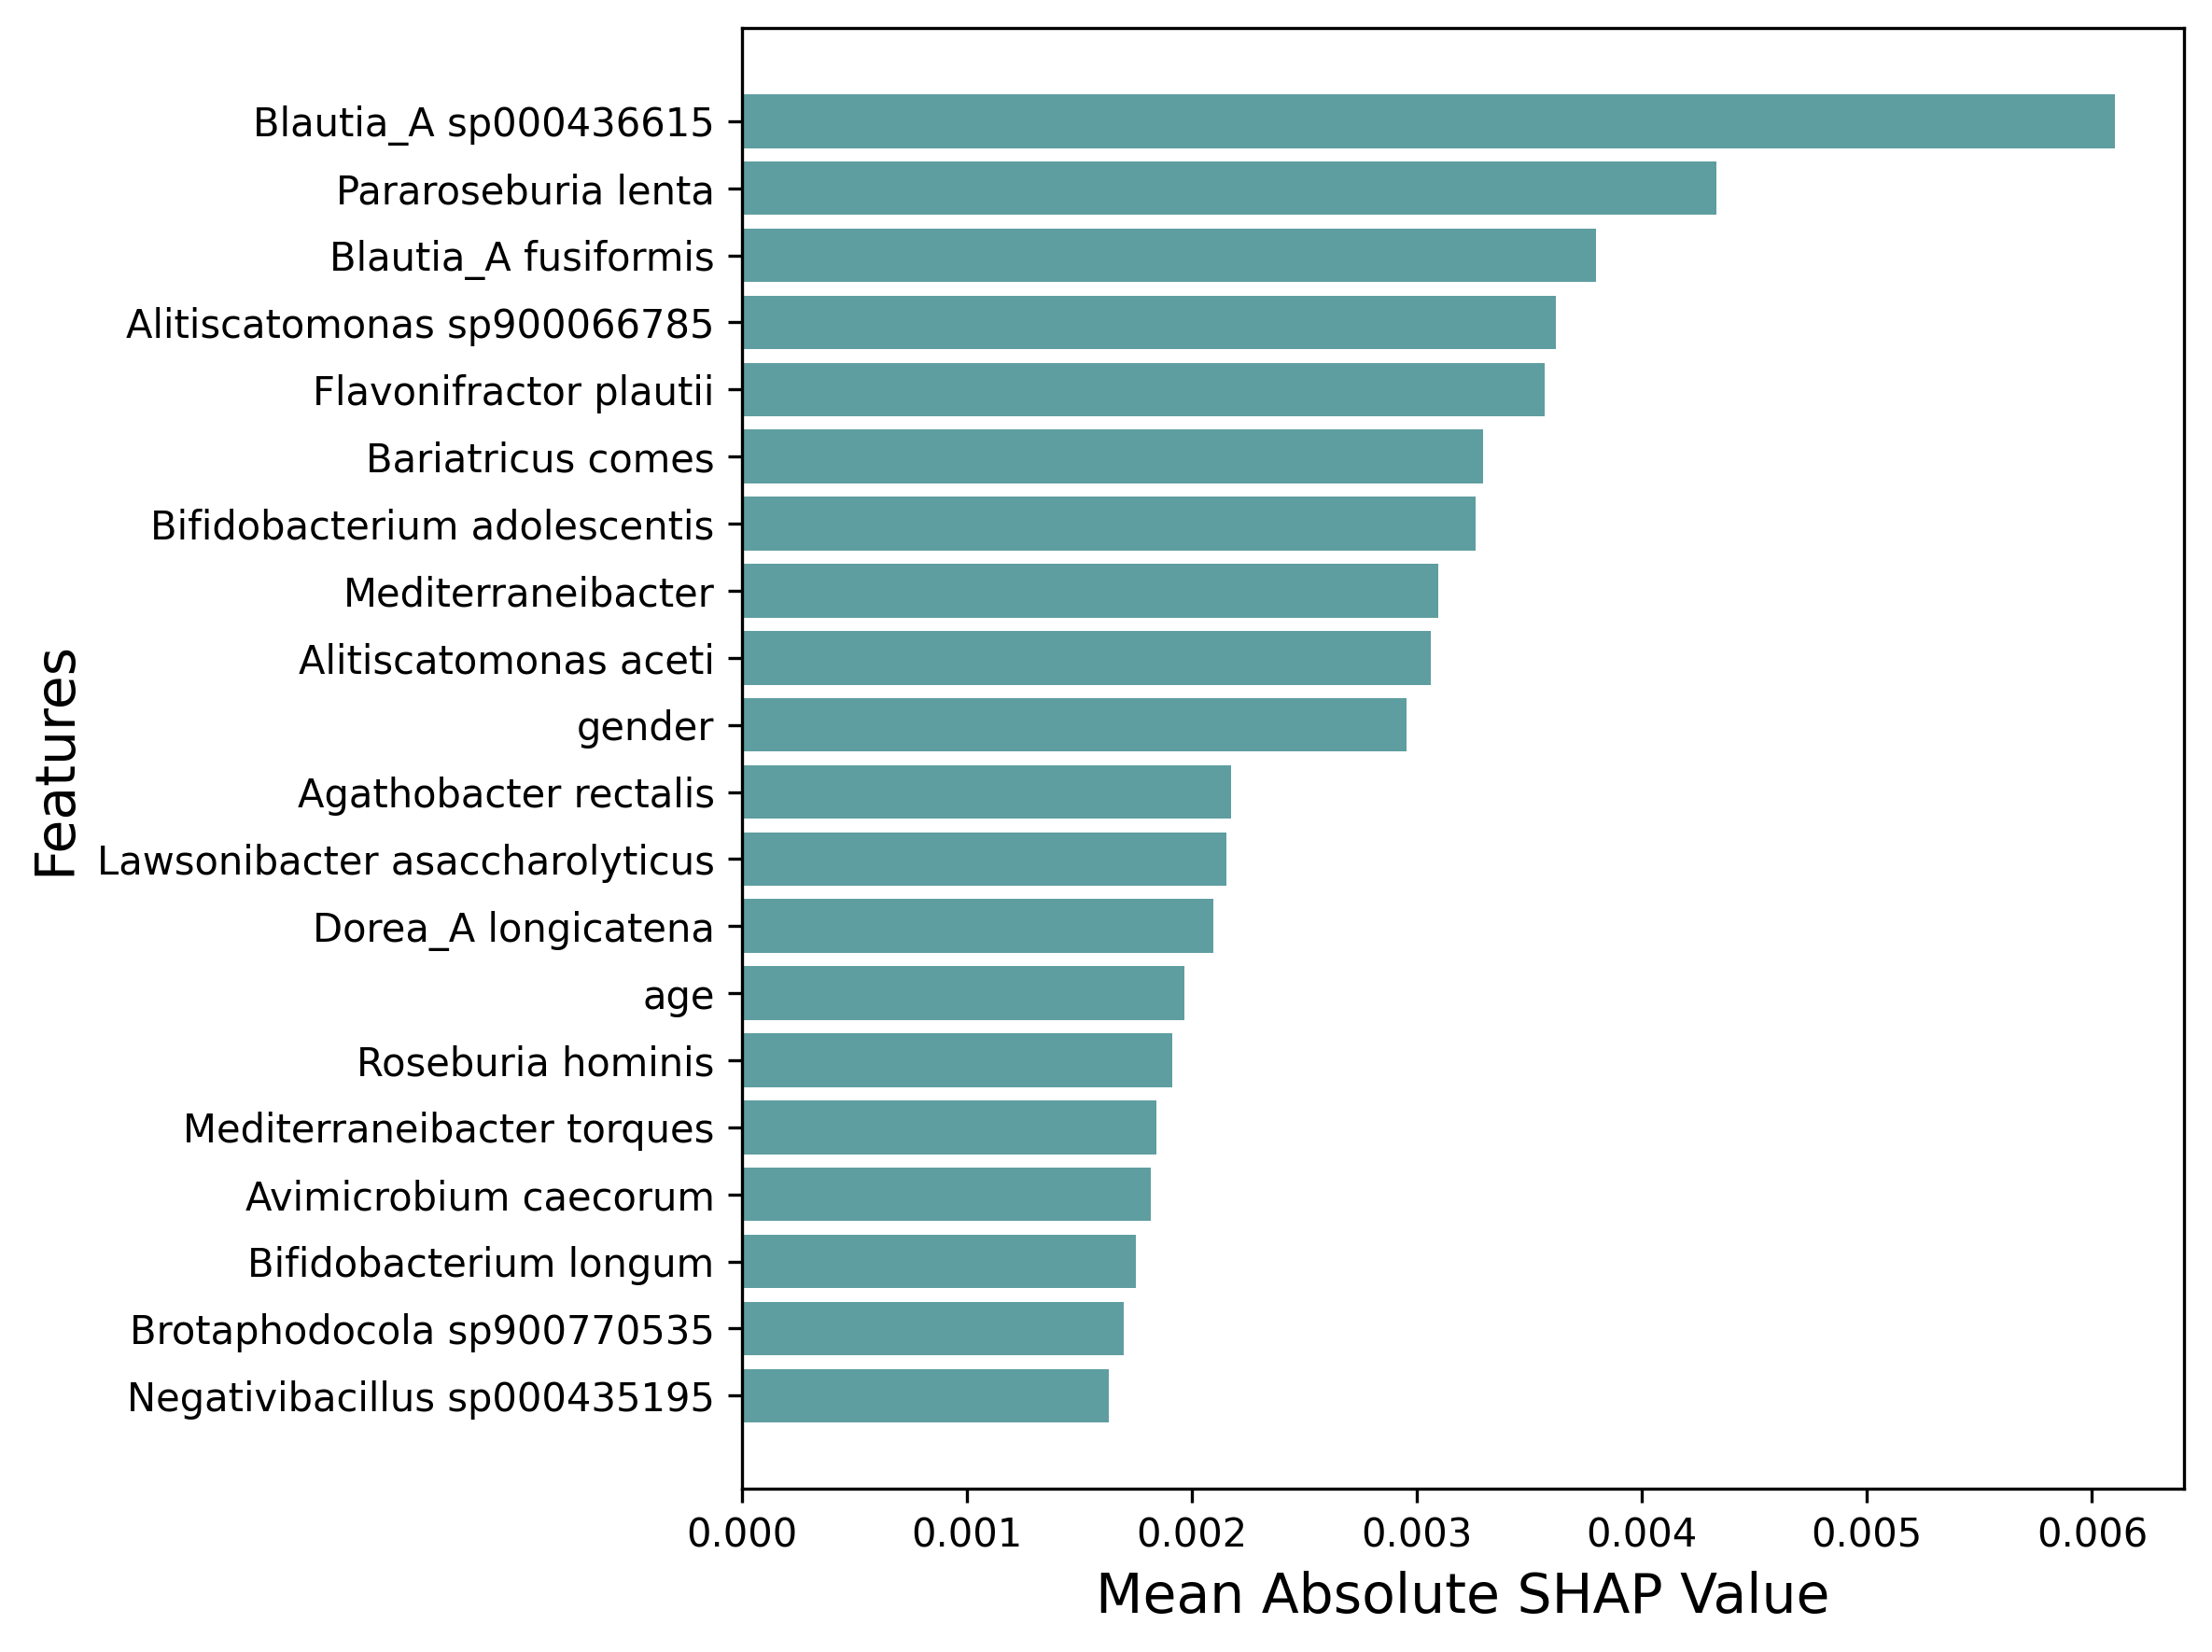

In [35]:
process_mean_abs_shap(mean_abs_shap_lgbm_adherence,  mb_features, mb_names, filename="diet_adherence" ,top_n=20)

NOVA score

In [36]:
# process_mean_abs_shap(mean_abs_shap_lgbm_nova,  mb_features, mb_names, top_n=20)

#### Are there foods that especially correlate ("affect") certain food types?

In [37]:
# mean_abs_shap_lgbm_all['max'] = mean_abs_shap_lgbm_all.max(axis=1)
# mean_abs_shap_lgbm_all['max_diet_feature'] = mean_abs_shap_lgbm_all.idxmax(axis=1)
# mean_abs_shap_lgbm_all

In [38]:
# max_food_feature = mean_abs_shap_lgbm_all[mean_abs_shap_lgbm_all['max'] > 0.02]
# features_of_max_diet_feature = max_food_feature.index
# max_food_feature

In [39]:
# fnames_of_max_microbes = pd.Series(mb_features).loc[features_of_max_microbes]
# fnames_of_max_microbes

In [40]:
# specific_mic_dict = {}
# for f_index in features_of_max_microbes:
#     mic_index = max_microbes.loc[f_index, "max_microbe"]
#     print(mic_index)
#     specific_mic_dict[fnames_of_max_microbes[f_index]] = mb_names.loc[targets[int(mic_index)], 'species']
#     print(mb_names.loc[targets[int(mic_index)], 'species'])
# specific_mic_dict


#### Three diet features impact none

In [41]:
# bottom_fnames_shap_all_mic = pd.Series(mb_features).loc[[735, 729, 721]]
# bottom_fnames_shap_all_mic

#### Predominant microbial features across a diet target group

In [42]:
# transpose so rows are microbes and cols are features?
# for each microbe, rank the features abs shap from 1 (highest) to 745 (lowest).
# For each feature, sum its rank across the microbes.
# Return the features with the lowest sum of rank.
# The lower the mean rank, the more important this feature is.

Each target is ranked separately, so all features are already on the same scale within each target before ranking.
Ranking is unit-free it assigns relative positions rather than using raw SHAP values.

### SHAP ranks

In [66]:
def analyze_shap_ranks(df, all_features, mb_names, filename, top_n=20):

    df = np.log1p(df)  

    # Calculate ranks for each target (column)
    ranks = df.rank(ascending=False)

    # Calculate mean rank across all targets for each feature
    mean_ranks = ranks.mean(axis=1)

    # Get top N features by mean rank
    top_features = mean_ranks.sort_values().head(top_n)

    # Get actual feature names
    feature_names = pd.Series(all_features).loc[top_features.index]

    # Convert microbial feature names to species names
    feature_names = convert_series_to_species(feature_names, mb_names)

    # Sort features by rank (highest to lowest)
    sorted_indices = np.argsort(top_features.values)[::-1]
    sorted_features = feature_names.iloc[sorted_indices]
    sorted_values = top_features.values[sorted_indices]

    # Create visualization
    plt.figure(figsize=(12, 8), dpi=300)  # Increase figure size

    bars = plt.barh(
        y=np.arange(len(sorted_features)),
        width=sorted_values,
        color='cadetblue',
        edgecolor=None
    )

    plt.ylabel('Features', fontsize=20, labelpad=20)
    plt.xlabel('Mean Rank', fontsize=20, labelpad=15)
    plt.title(f'Top LGBM Predictors of All Targets', fontsize=22, pad=10)

    plt.yticks(np.arange(len(sorted_features)), sorted_features, fontsize=18)
    plt.xticks(fontsize=18)

    # Fix: Set xlim to add space for text labels
    plt.xlim(0, max(sorted_values) * 1.09)  # Add 10% padding

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.3,  # Fix: Offset text slightly to the right
                 bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}',
                 ha='left', va='center', fontsize=16)

    plt.tight_layout()

    summary_df = pd.DataFrame({
        'Feature': feature_names,
        'Mean_Rank': top_features.values,
        'Std_Rank': ranks.loc[top_features.index].std(axis=1),
        'Min_Rank': ranks.loc[top_features.index].min(axis=1),
        'Max_Rank': ranks.loc[top_features.index].max(axis=1)
    })

    plt.savefig(home + f"figures/reverse/mean_shap_ranks_{filename}.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')

    summary_df = summary_df.iloc[sorted_indices]

    return summary_df, plt.gcf()

Top pearson corr targets

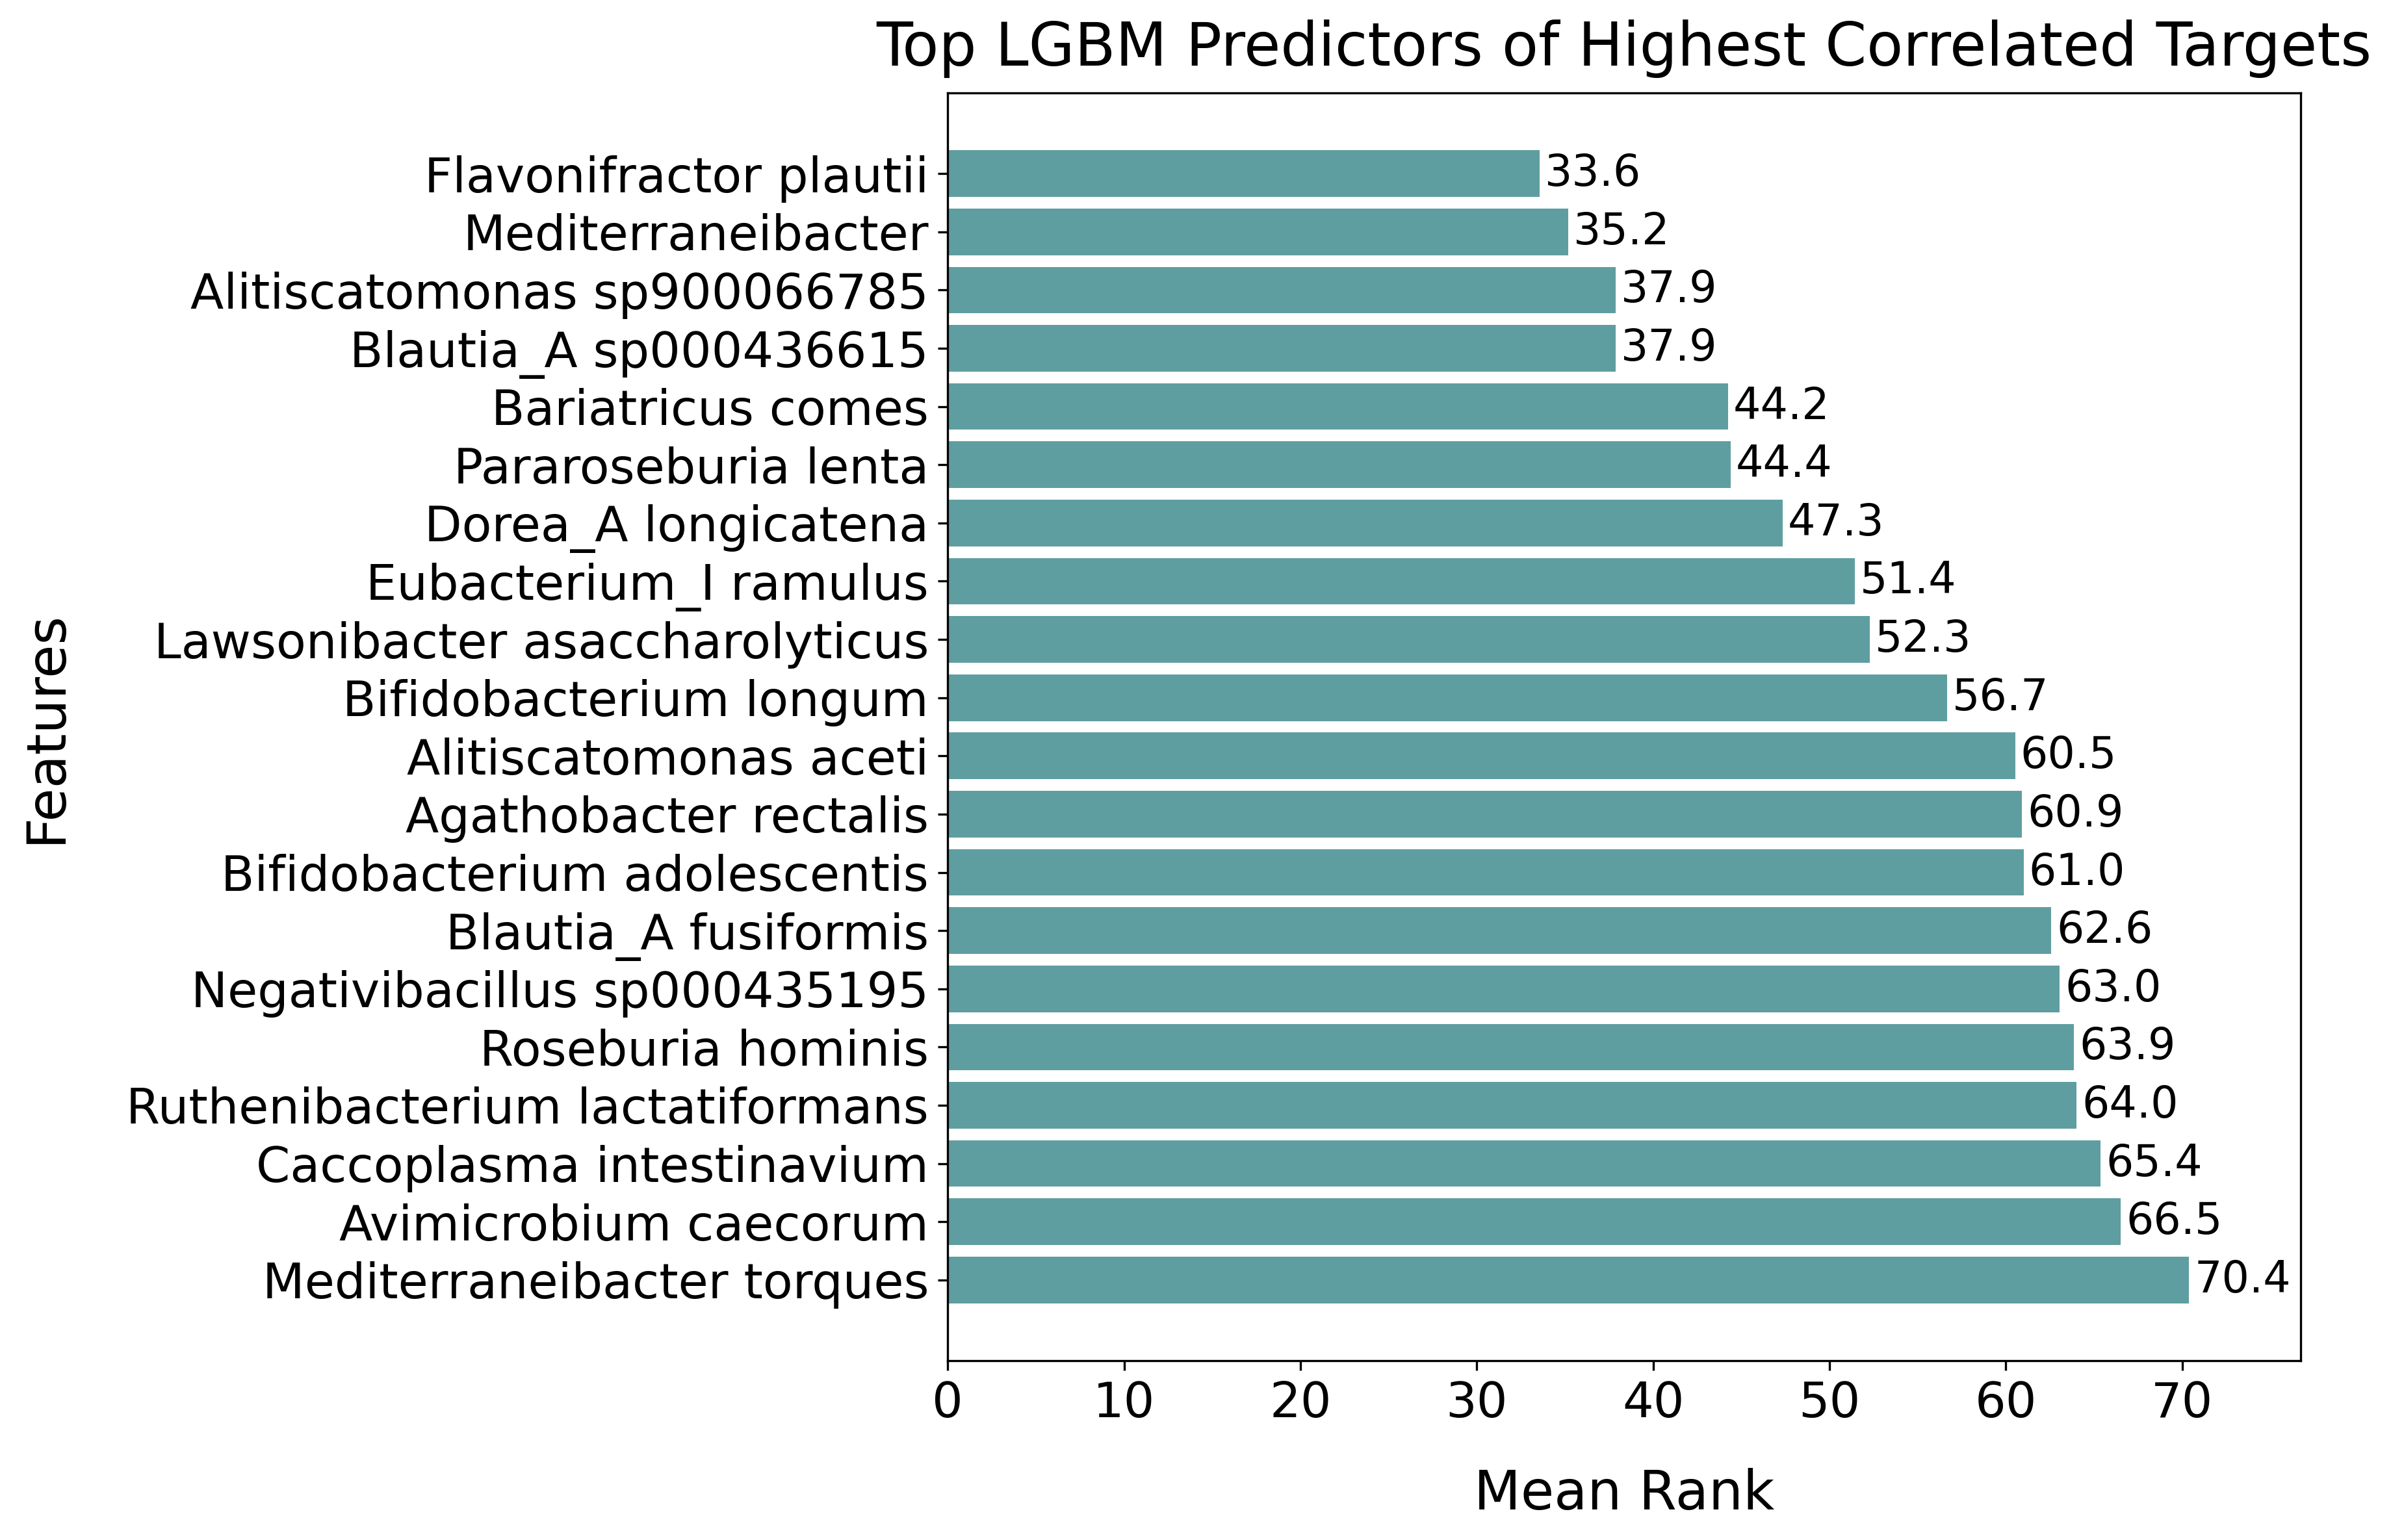

In [52]:
summary_df, fig = analyze_shap_ranks(mean_abs_shap_lgbm_top, mb_features, mb_names, filename="top_20_pearson", top_n=20)

Diet adherence targets

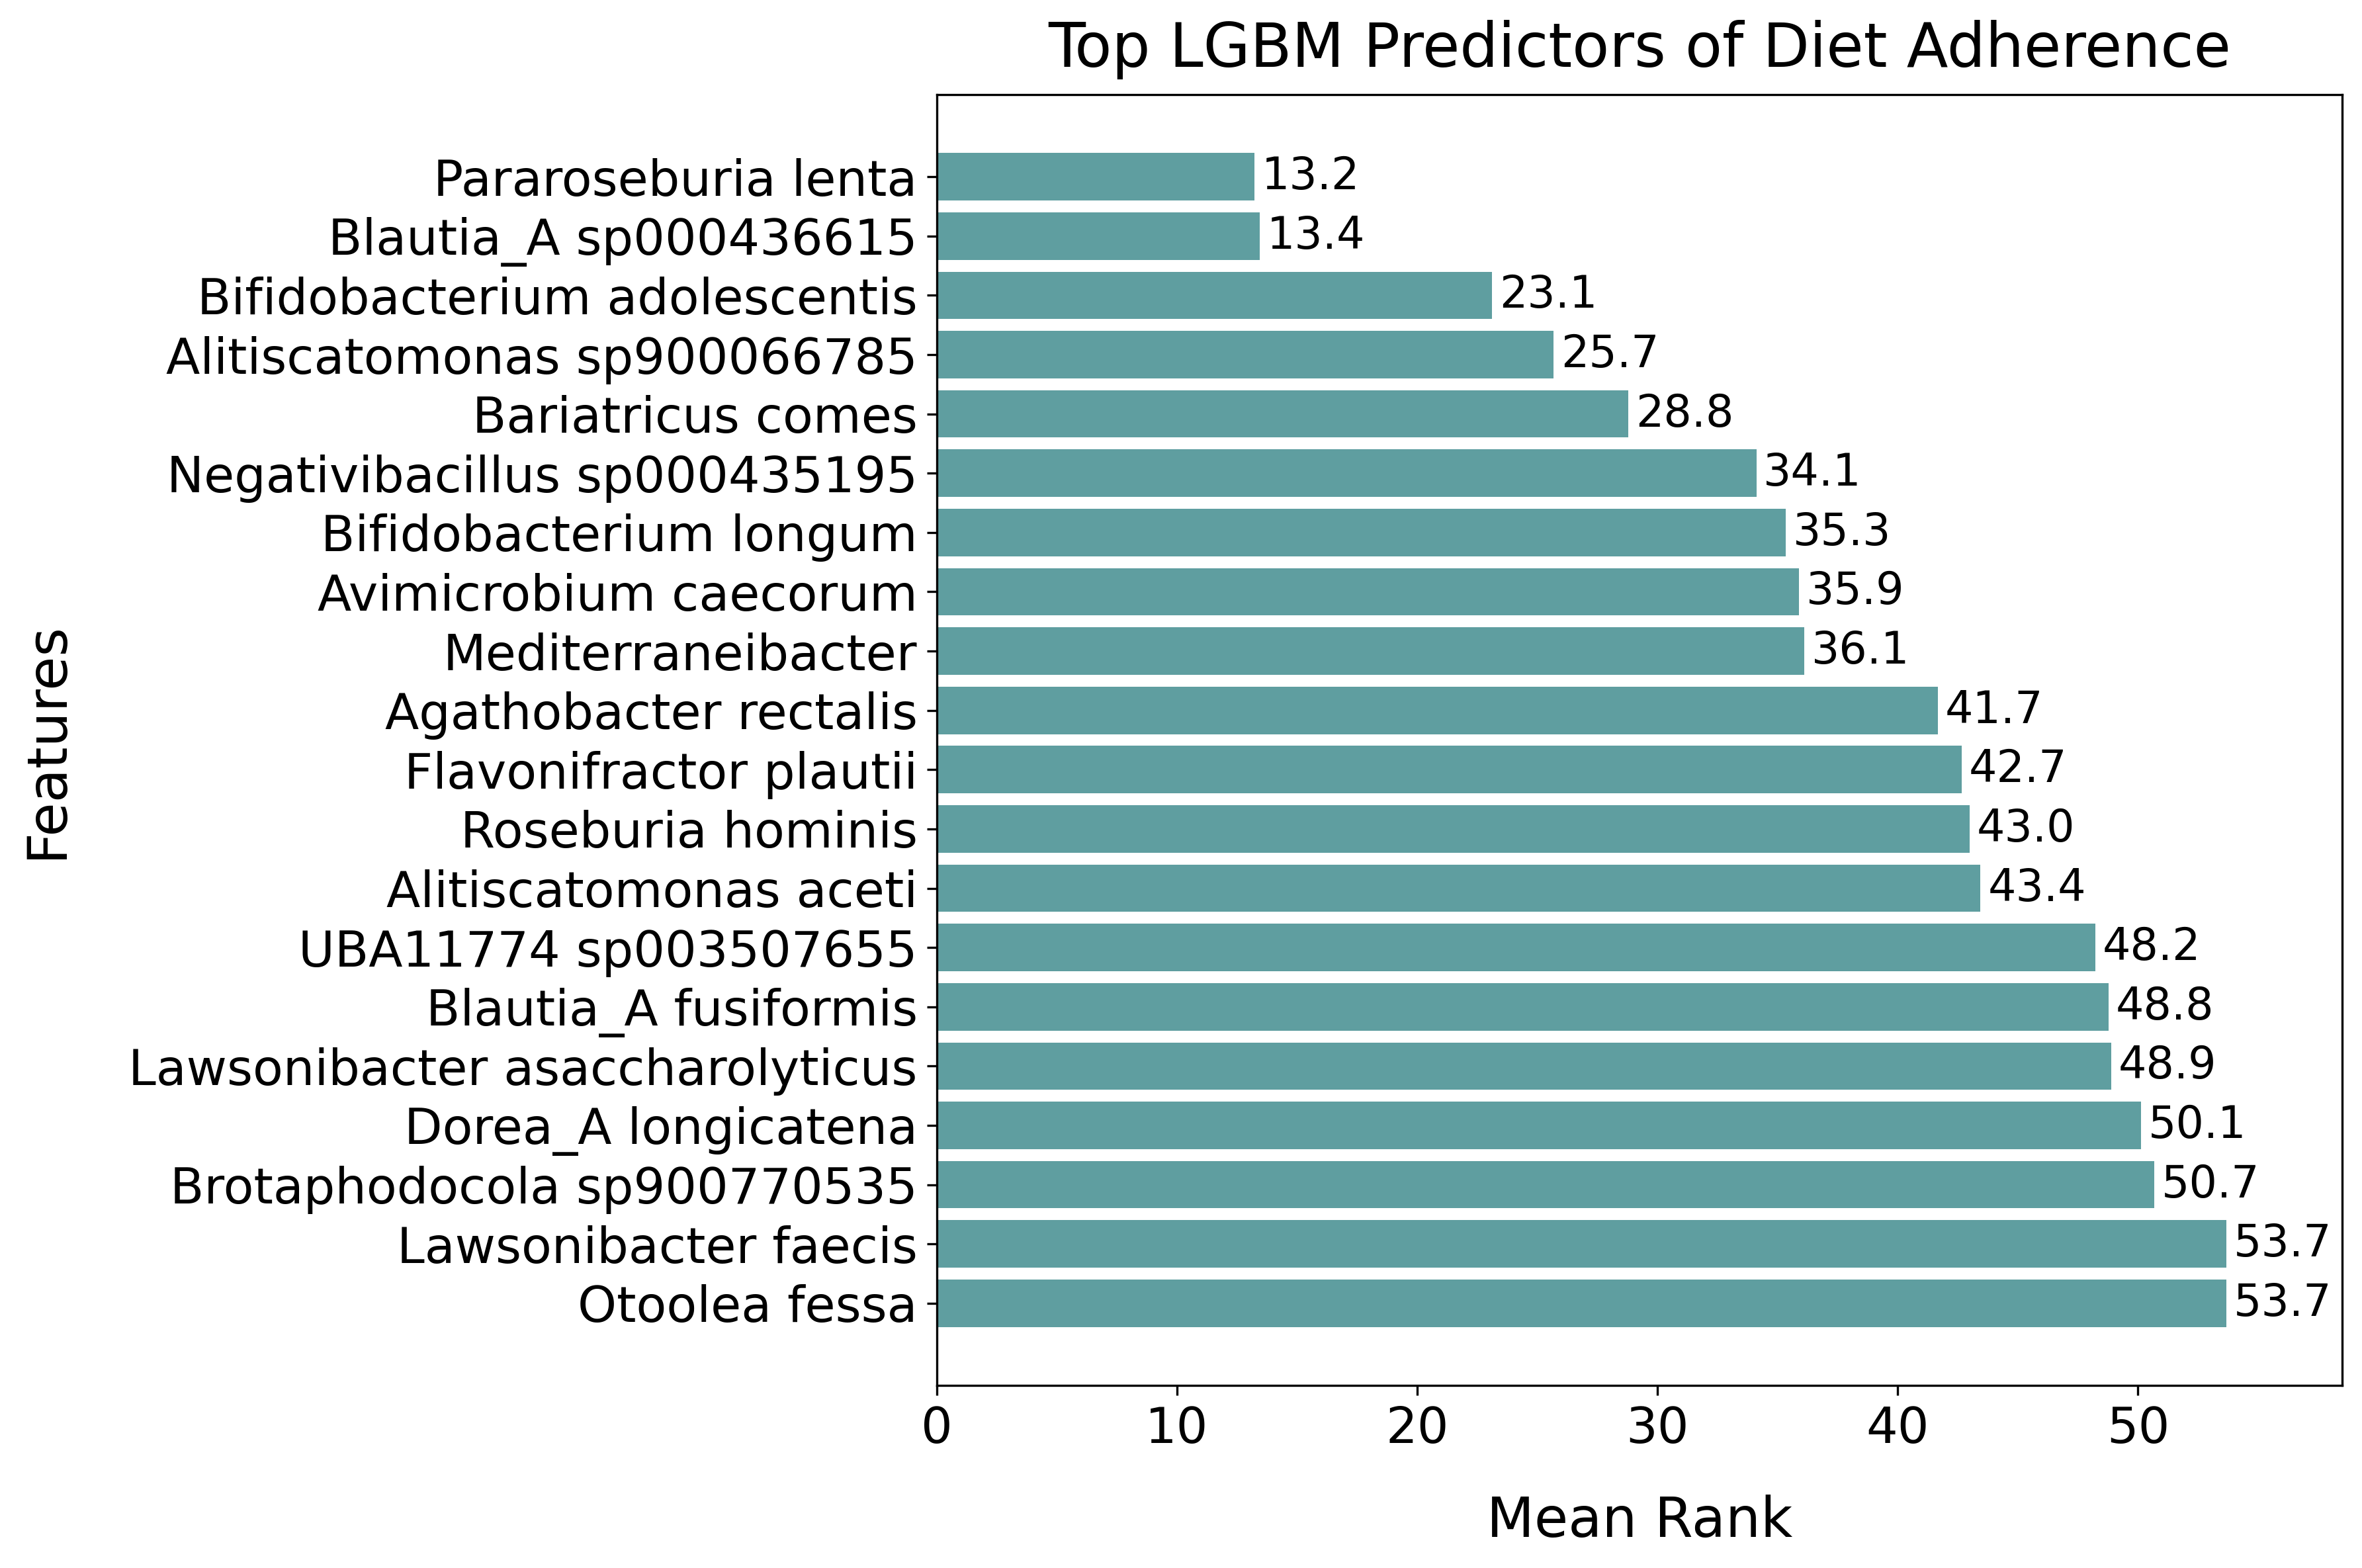

In [45]:
summary_df, fig = analyze_shap_ranks(mean_abs_shap_lgbm_adherence, mb_features, mb_names, filename="diet_adherence", top_n=20)

All Diet Targets

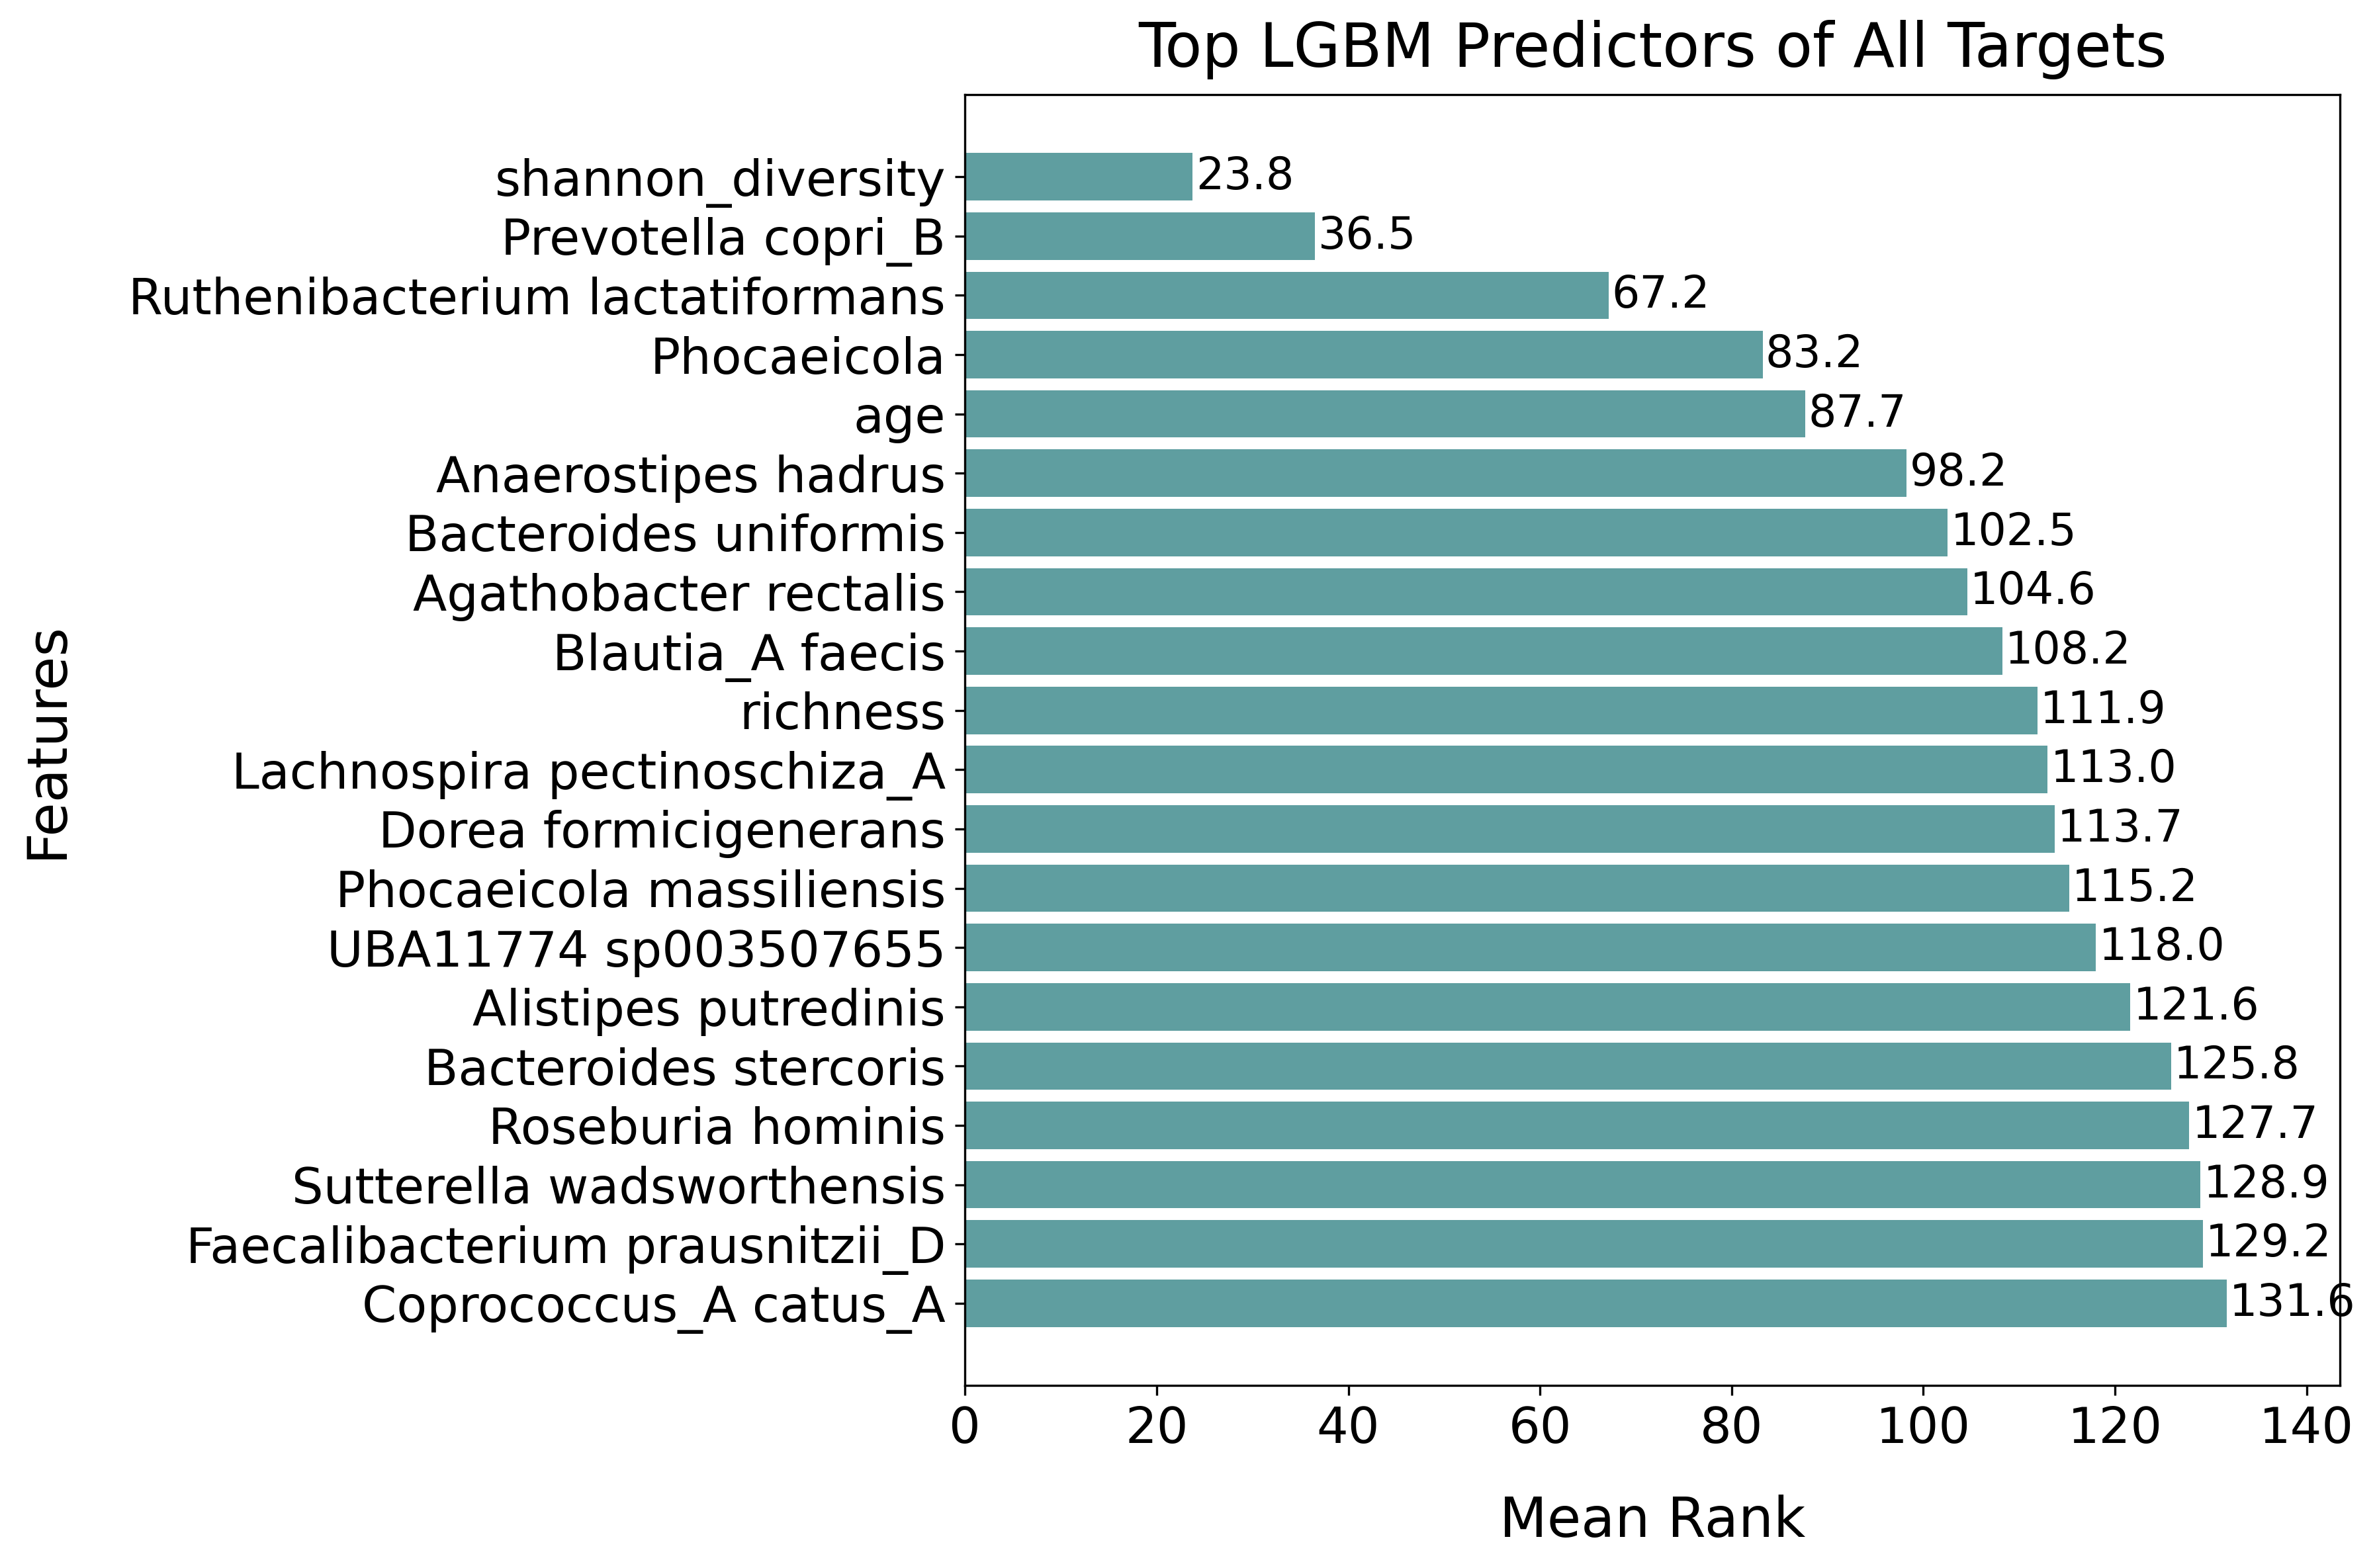

In [67]:
summary_df, fig = analyze_shap_ranks(mean_abs_shap_lgbm_all, mb_features, mb_names, filename="all_targets", top_n=20)

#### What are the SHAP values for the highly correlated microbes?

Summary plots are done in "SHAP_summary_plot.py"

In [46]:
# for microbe_index in top_microbes.index:
#     top_coefs = mean_abs_shap_lgbm_abundance.iloc[:,microbe_index].sort_values(ascending=False)[0:20]
#     top_fnames = pd.Series(lgbm_diet_fnames[0]).loc[top_coefs.index]
#     to_plot = pd.DataFrame(top_coefs).set_index(top_fnames)
#     to_plot.columns = ['']
#     print(to_plot)
#     to_plot.plot.barh()
#     plt.title("What dietary features predict the highly correlated microbes?")
#     plt.legend().remove()
#     # plt.xticks(rotation=90)
#     plt.savefig("top_microbes_features_freq.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
#     plt.show()
#     plt.clf()

### Microbes with one extreme feature
The first shap value is at least twice the second shap value.

In [47]:
# mean_abs_shap_lgbm_abundance

In [48]:
# mean_abs_shap_lgbm_abundance_transposed = mean_abs_shap_lgbm_abundance.transpose()

# def first_second_ratio(row):
#     sorted_row = row.sort_values(ascending=False)
#     return sorted_row.iloc[0] >= 10 * sorted_row.iloc[1]

# mic_with_extreme_feature = mean_abs_shap_lgbm_abundance_transposed[mean_abs_shap_lgbm_abundance_transposed.apply(first_second_ratio, axis=1)]
# mic_with_extreme_feature


In [49]:
# print(mic_with_extreme_feature.iloc[:, 99])
# print("The extreme mean shap value:", mic_with_extreme_feature.max(axis=1))
# print("The extreme feature index:", mic_with_extreme_feature.idxmax(axis=1))
# print("The extreme feature:", pd.Series(mb_features).loc[mic_with_extreme_feature.idxmax(axis=1)])
# print("The microbe:", mb_names.loc[targets[99], 'species'])

### Probiotics
* Summary plots of the strains
* Mean shap values of bifidobacterium and of lactobacillus.

In [50]:
# print(mb_names['species'][mb_names['species'].str.contains("Bi")])

In [51]:
# # probiotics = ["Lactobacillus acidophilus", "Lactobacillus rhamnosus", "Lactobacillus casei", "Lactobacillus plantarum", "Bifidobacterium longum", "Bifidobacterium bifidum", "Bifidobacterium lactis", "Streptococcus thermophilus", "Saccharomyces boulardii", "Escherichia coli Nissle 1917", "Enterococcus faecium"]
# # probiotics_indices = []

# print(mb_names["species"][mb_names["species"].str.contains("oul")])

# # for probiotic in probiotics:
# #     mb_code = mb_names[mb_names['species'] == probiotic].index
# #     print(mb_code)
# #     print(mb_code[0])
# #     probiotics_indices.append(targets.index(mb_code[0]))

# # print(probiotics_indices)

In [52]:
# # Bifidobacterium

# def analyze_genus(genus):
#     genus_names = mb_names[mb_names['genus'].str.contains(genus)].index
#     genus_indices = []
#     for name in genus_names:
#         genus_indices.append(int(targets.index(name)))
#     print(genus_indices) 

#     # Pearson's correlations

#     bifido_corr = lgbm_diet_scores.loc[genus_indices]
#     print(bifido_corr)

#     genus_indices = [str(x) for x in genus_indices]
#     mean_abs_shap_genus = mean_abs_shap_lgbm_abundance.loc[:, list(genus_indices)]
#     print(mean_abs_shap_genus)

#     mean_abs_shap_genus['mean_abs_shap'] = mean_abs_shap_genus.mean(axis=1)
#     print(mean_abs_shap_genus['mean_abs_shap'])

#     top_shap_genus = mean_abs_shap_genus['mean_abs_shap'].sort_values(ascending=False).head(10).index
#     top_fnames_shap_genus = pd.Series(mb_features).loc[top_shap_genus]

#     print(pd.concat([top_fnames_shap_genus, mean_abs_shap_genus['mean_abs_shap'].sort_values(ascending=False).head(10)], axis=1))

#     # Assuming the data is provided as described
#     # Combining the feature names with their SHAP values
#     shap_data = pd.concat([top_fnames_shap_genus, mean_abs_shap_genus['mean_abs_shap'].sort_values(ascending=False).head(10)], axis=1)

#     # Rename columns for clarity
#     shap_data.columns = ['Feature', 'Mean Absolute SHAP Value']

#     # Sort values by SHAP for better visual clarity
#     shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

#     # Create a horizontal bar chart
#     plt.figure(figsize=(8, 6))
#     plt.barh(shap_data['Feature'], shap_data['Mean Absolute SHAP Value'], color='cadetblue', edgecolor='none')

#     # Add labels and title
#     plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
#     plt.ylabel('Features', fontsize=14)
#     # plt.title('Top Features by Mean Absolute SHAP Value', fontsize=14)

#     # Improve layout
#     plt.tight_layout()
#     plt.savefig(home_path + "figures/mean_abs_shap_bifidobacterium.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')

#     # Show the plot
#     plt.show()


In [53]:
# analyze_genus("Bifidobacterium")

In [54]:
# analyze_genus('[Ll]acto')

In [55]:
# lgbm_diet_scores.index

In [56]:
# microbe_name_list = []

# for microbe_index in lgbm_diet_scores.index:
#     microbe_name_list.append(mb_names.loc[targets[microbe_index], 'species'])

# # Create the DataFrame with numerical indices
# df = pd.DataFrame({
#     'Microbe_Name': microbe_name_list,
#     'Pearson Correlation': list(lgbm_diet_scores),
#     'targets': targets
# })
# df.loc[df['Microbe_Name'] == 'Clostridium sp900539375']


### Noam's Plots - Finding Main Predictors

Based on Mean Abs SHAP values - need to scale!

Final heatmap data shape: (100, 30)


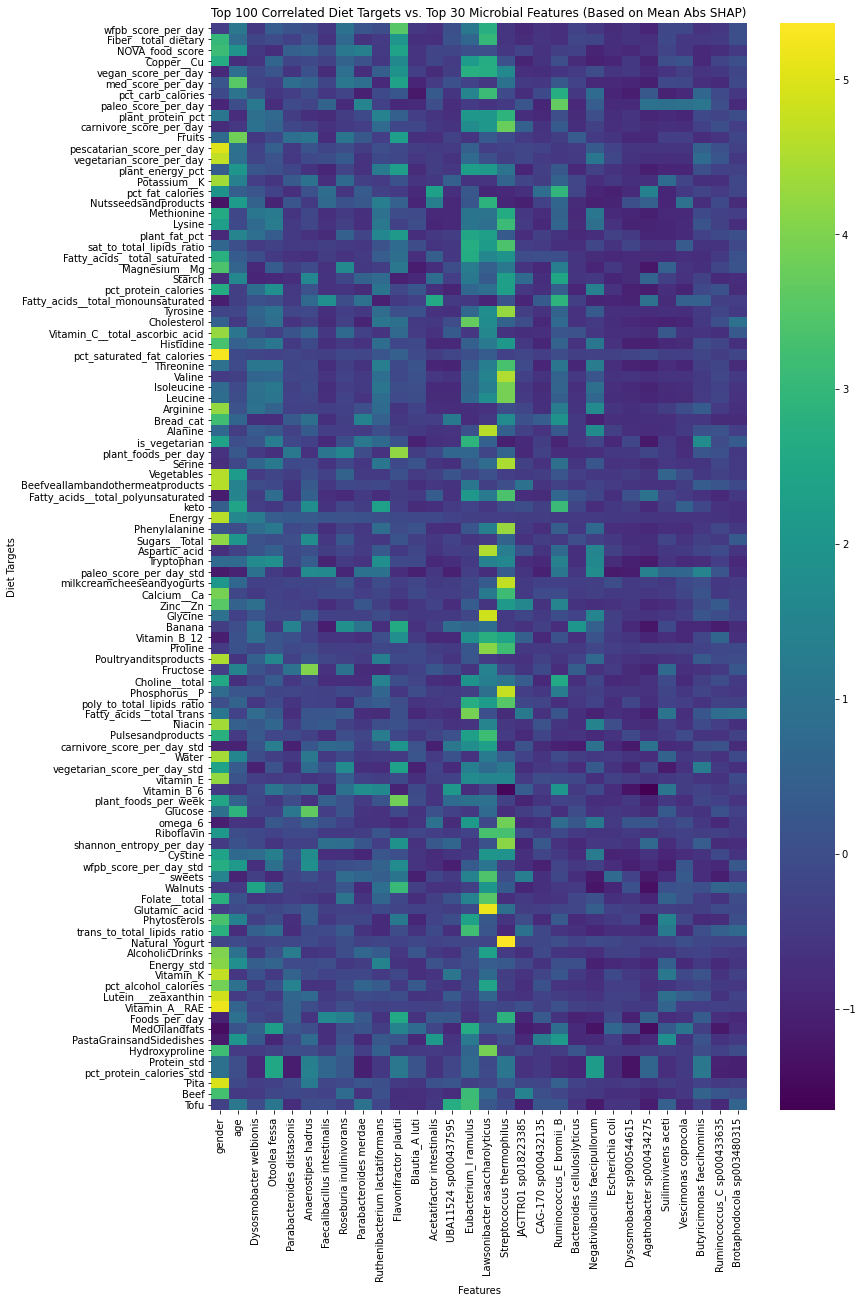

In [81]:
# Step 1: Extract the indices of the top 100 highest correlated microbes
top_100_indices = lgbm_diet_scores.sort_values(ascending=False)
top_100_indices = top_100_indices.head(100).index
# print("Top 100 indices from lgbm_diet_scores:", top_100_indices)

# Step 2: Subset mean_abs_shap using these indices
top_100_indices_str = [str(i) for i in top_100_indices]

mean_abs_shap_top_100 = mean_abs_shap_lgbm_all[top_100_indices_str]

# print("Subset of mean_abs_shap using top 100 indices:\n", mean_abs_shap_top_100)

# Step 3: Identify the 30 features with the highest maximum mean_abs_shap values
# .max(axis=1) is per row (microbial feature), finding the biggest shap value of each feature
# This selects the top 30 microbial features by comparing the max shap of all the feature and ranking

mean_abs_shap_top_100 = np.log1p(mean_abs_shap_top_100)

top_30_features = mean_abs_shap_top_100.max(axis=1).nlargest(30).index
# top_30_features = top_30_features.astype(int)

# Step 4: Subset the DataFrame to include only the selected features
heatmap_data = mean_abs_shap_top_100.loc[top_30_features]

heatmap_data = heatmap_data.apply(zscore, axis=0)

# # Step 5: Rename the axis labels
heatmap_data = heatmap_data.T
print("Final heatmap data shape:", heatmap_data.shape)

# Replace x-axis (columns) with corresponding feature names
# Convert microbial feature names to species names
mb_features_converted = convert_series_to_species(pd.Series(mb_features), mb_names)

# Assign the converted species names as column labels
heatmap_data.columns = [mb_features_converted[int(i)] for i in top_30_features]

# # Replace y-axis (rows) with corresponding target names
heatmap_data.index = [all_diet_targets[int(i)] for i in top_100_indices]

# A yellow square means that for that specific combination of ferature and target,
# the SHAP value is much higher than others.

plt.figure(figsize=(12, 20))
sns.heatmap(heatmap_data, cmap="viridis", annot=False)
plt.xlabel("Features")
plt.ylabel("Diet Targets")
plt.title("Top 100 Correlated Diet Targets vs. Top 30 Microbial Features (Based on Mean Abs SHAP)")
plt.savefig(home + f"figures/reverse/shap_main_predictors_mean_abs.pdf", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()


Based on Minimum Rank

Final heatmap data shape: (100, 32)


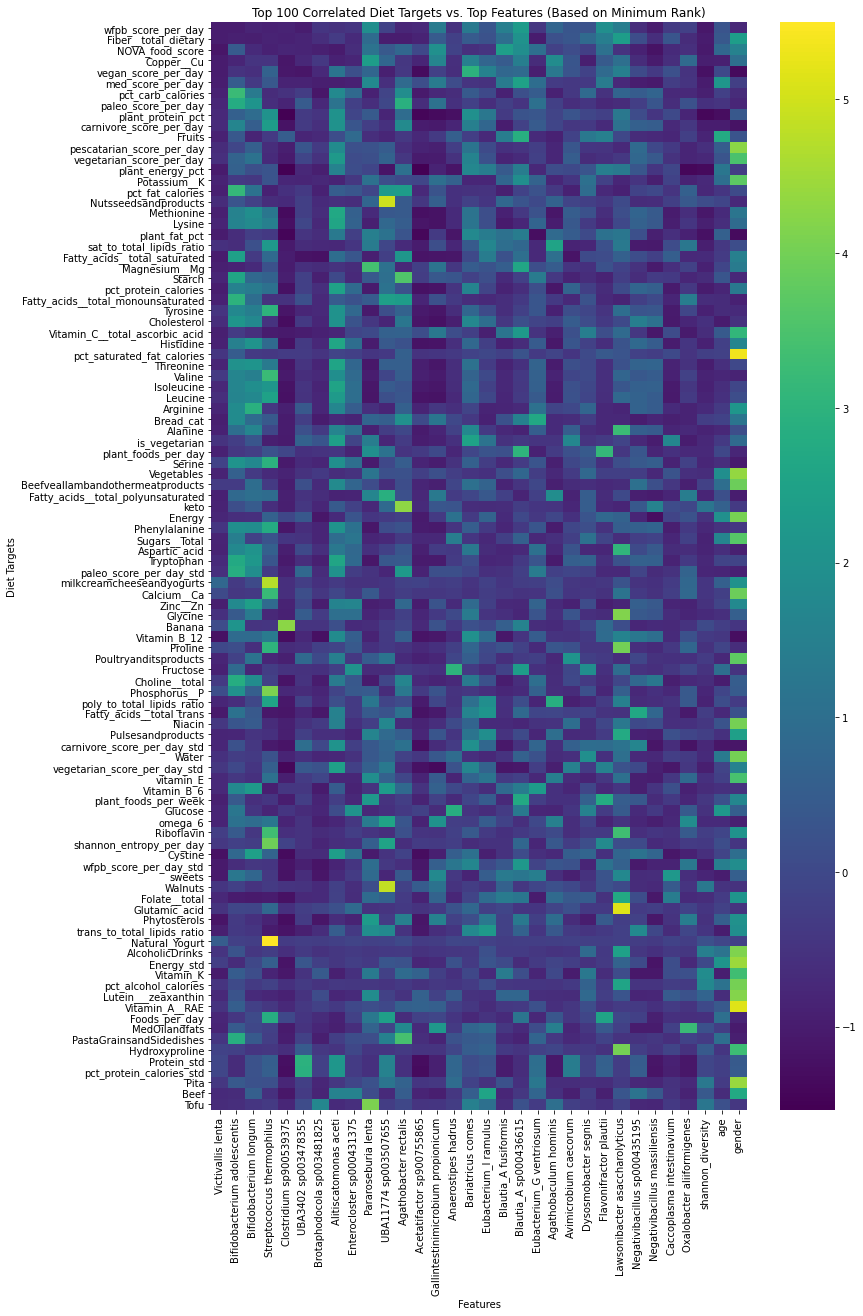

In [71]:
# Step 1: Extract the indices of the top 100 highest correlated microbes
top_100_indices = lgbm_diet_scores.sort_values(ascending=False).head(100).index

# Step 2: Subset mean_abs_shap using these indices
top_100_indices_str = [str(i) for i in top_100_indices]
mean_abs_shap_top_100 = mean_abs_shap_lgbm_all[top_100_indices_str]

# Step 3: Compute feature ranks (lower rank = more important) WITHOUT log1p
ranks = mean_abs_shap_top_100.rank(ascending=False)

# Step 4: Select features based on rank instead of SHAP values
top_30_features = ranks[ranks.min(axis=1) <= 2].index  # Select features ranked ≤2 in any column

# Step 5: Subset SHAP values using .loc[]
heatmap_data = mean_abs_shap_top_100.loc[top_30_features]

# Step 6: Apply log1p AFTER selecting features (log1p is needed for heatmap scaling)
heatmap_data = np.log1p(heatmap_data)

# Step 7: Apply Z-score normalization AFTER log1p for better visualization
heatmap_data = heatmap_data.apply(zscore, axis=0)

# Step 8: Transpose for heatmap
heatmap_data = heatmap_data.T
print("Final heatmap data shape:", heatmap_data.shape)

# Convert microbial feature names to species names
mb_features_converted = convert_series_to_species(pd.Series(mb_features), mb_names)
heatmap_data.columns = [mb_features_converted[int(i)] for i in top_30_features]

# Replace y-axis (rows) with corresponding target names
heatmap_data.index = [all_diet_targets[int(i)] for i in top_100_indices]

# Step 9: Plot Heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(heatmap_data, cmap="viridis", annot=False)
plt.xlabel("Features")
plt.ylabel("Diet Targets")
plt.title("Top 100 Correlated Diet Targets vs. Top Features (Based on Minimum Rank)")

# plt.savefig(home + f"figures/reverse/shap_main_predictors_mean_rank.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')

plt.show()
